## II Diabetic readmission data exploratory analysis

### Steps:
#### 1.Group features that belong to a same domain: patient demographic; hospitailization;diagnosis;diabetic lab result and medication
#### 2. Analyze the data distribution and relationship with readmission for each group
#####      2.1 Univariate analysis of data distribution 
#####      2.2 replace missing value as 'UNK' for some features
#####     2.2 create a seperate dataset with outliers removed based on quitiles 
#####    2.3. Mulitvariate analysis of realtionship between target variable and features, or between features

In [122]:
import pandas as pd
import pandas_profiling
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Import data from last step of data cleansing 

In [123]:
Diabetic_data=pd.read_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\diabetic_data_clean.csv')

C:\Users\yafen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
Diabetic_data.drop(columns=['Unnamed: 0'],inplace=True)

In [125]:
Diabetic_data.shape

(70510, 45)

## Profiling of all the features

In [126]:
#profile=pandas_profiling.ProfileReport(Diabetic_data)

In [127]:
#profile

## Distribution of target variable 'readmitted'

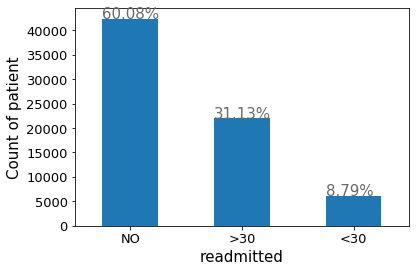

In [128]:
%matplotlib inline
ax = Diabetic_data['readmitted'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                            rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Count of patient", fontsize=15);
ax.set_xlabel("readmitted", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+0.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

## Patient demographic features distribution and relationship with readmission 

In [129]:
patient_demo_feature=['gender','race','age']

### Remove gender as unknown

In [130]:
Diabetic_data=Diabetic_data[Diabetic_data['gender']!='Unknown/Invalid']
Diabetic_data.shape

(70507, 45)

### Group age into three groups

In [131]:
Diabetic_data.loc[Diabetic_data['age'].isin(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)']),['age']]='<60'
Diabetic_data.loc[Diabetic_data['age'].isin(['[60-70)','[70-80)']),['age']]='60-80'
Diabetic_data.loc[Diabetic_data['age'].isin(['[80-90)','[90-100)']),['age']]='>80'      

### Distribution of gender

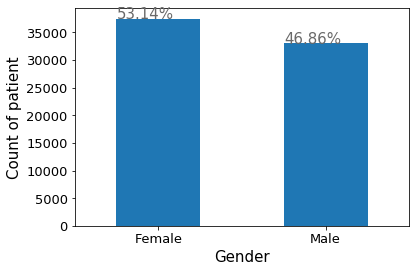

In [132]:
%matplotlib inline
ax = Diabetic_data['gender'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Count of patient", fontsize=15);
ax.set_xlabel("Gender", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+0.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

### Distribution of age

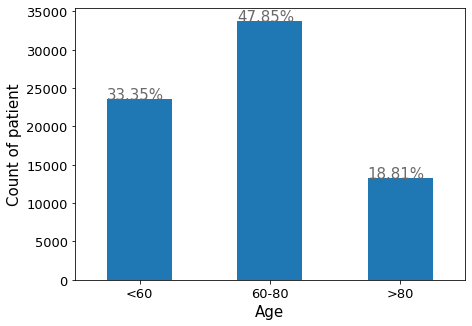

In [133]:
ax = Diabetic_data['age'].value_counts()[['<60','60-80','>80']].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Count of patient", fontsize=15)
ax.set_xlabel('Age',fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

### Distribution of race

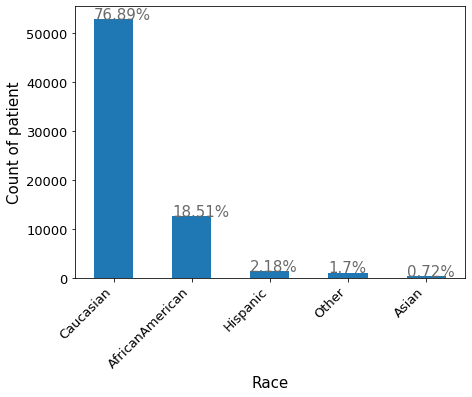

In [134]:
ax = Diabetic_data['race'].value_counts().plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Count of patient", fontsize=15)
ax.set_xlabel('Race',fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

## Bivariate analysis of patient demographic feature with readmission

### Gender and readmission

In [135]:
gender_readmission_crosstab = pd.crosstab(
    Diabetic_data['gender'],
    Diabetic_data['readmitted'],
    margins =False
)
gender_readmission_crosstab

readmitted,<30,>30,NO
gender,,,
Female,3306,11939,22220
Male,2892,10011,20139


In [136]:
gender_readmission_crosstab_percent =gender_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
gender_readmission_crosstab_percent

readmitted,<30,>30,NO
gender,,,
Female,8.824236,31.867076,59.308688
Male,8.752497,30.297803,60.949700


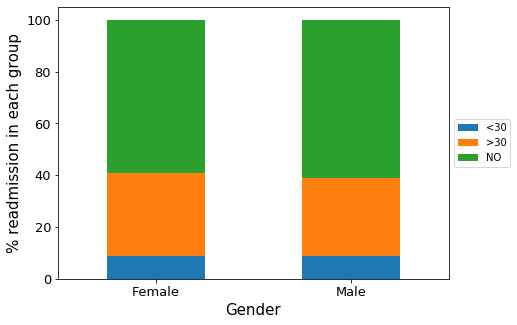

In [137]:
ax = gender_readmission_crosstab_percent.plot(kind='bar',
                                              figsize=(7,5),
                                              #color=[900,1000,1000], 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Gender',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [138]:
# print ('gender and readmission')
# print('chi square value:',stats.chi2_contingency(age_readmission_crosstab[['<30','NO']])[0])
# print('p value:',stats.chi2_contingency(age_readmission_crosstab[['<30','NO']])[1])

### Age and readmission

In [139]:
age_readmission_crosstab = pd.crosstab(
    Diabetic_data['age'],
    Diabetic_data['readmitted'],
    margins = False
)
age_readmission_crosstab

readmitted,<30,>30,NO
age,,,
60-80,3196,10950,19589
<60,1661,6726,15126
>80,1341,4274,7644


In [140]:
stats.chi2_contingency(age_readmission_crosstab)

(302.9876953075486,
 2.456463096763489e-64,
 4,
 array([[ 2965.51448792, 10502.26573248, 20267.2197796 ],
        [ 2066.93766576,  7319.98737714, 14126.0749571 ],
        [ 1165.54784631,  4127.74689038,  7965.70526331]]))

In [141]:
print ('Age and readmission')
print('chi square value:',stats.chi2_contingency(age_readmission_crosstab)[0])
print('p value:',stats.chi2_contingency(age_readmission_crosstab)[1])

Age and readmission
chi square value: 302.9876953075486
p value: 2.456463096763489e-64


In [142]:
age_readmission_crosstab_percent =age_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
age_readmission_crosstab_percent

readmitted,<30,>30,NO
age,,,
60-80,9.473840,32.458871,58.067289
<60,7.064177,28.605452,64.330370
>80,10.113885,32.234708,57.651407


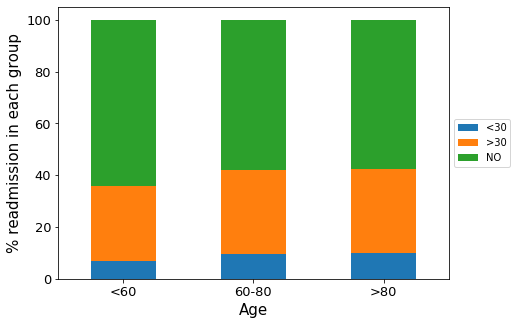

In [143]:
ax = age_readmission_crosstab_percent.loc[['<60','60-80','>80']].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Age',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
#ax.set_xticks(['<60','60-80','>80'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [144]:
age_readmission_crosstab_percent['<30'][['<60','60-80','>80']]

age
<60       7.064177
60-80     9.473840
>80      10.113885
Name: <30, dtype: float64

### Race and readmission

In [145]:
race_readmission_crosstab = pd.crosstab(
    Diabetic_data['race'],
    Diabetic_data['readmitted'],
    margins = False
)
race_readmission_crosstab

readmitted,<30,>30,NO
race,,,
AfricanAmerican,1078,3834,7781
Asian,41,106,348
Caucasian,4740,16865,31118
Hispanic,119,405,970
Other,79,308,777


In [146]:
stats.chi2_contingency(race_readmission_crosstab)

(90.45602723755894,
 3.7575583024196487e-16,
 8,
 array([[ 1121.22826642,  3983.2573612 ,  7588.51437238],
        [   43.72551736,   155.33856407,   295.93591856],
        [ 4657.25343814, 16545.28305794, 31520.46350392],
        [  131.97156149,   468.84002975,   893.18840876],
        [  102.82121658,   365.28098703,   695.89779638]]))

In [147]:
print ('Race and readmission')
print('chi square value:',stats.chi2_contingency(race_readmission_crosstab)[0])
print('p value:',stats.chi2_contingency(race_readmission_crosstab)[1])

Race and readmission
chi square value: 90.45602723755894
p value: 3.7575583024196487e-16


In [148]:
race_readmission_crosstab_percent =race_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
race_readmission_crosstab_percent

readmitted,<30,>30,NO
race,,,
AfricanAmerican,8.492870,30.205625,61.301505
Asian,8.282828,21.414141,70.303030
Caucasian,8.990384,31.987937,59.021679
Hispanic,7.965194,27.108434,64.926372
Other,6.786942,26.460481,66.752577


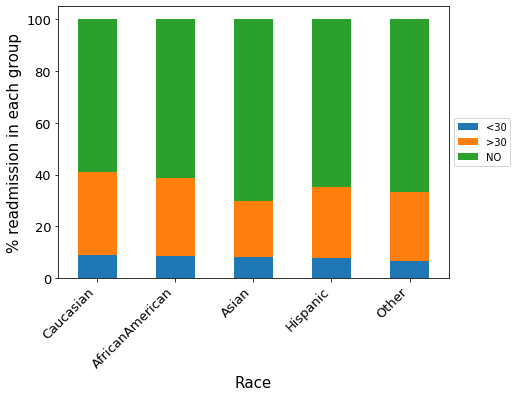

In [149]:
ax = race_readmission_crosstab_percent.sort_values('<30',ascending=False).plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Race',fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Hospitalization features 
### Hospitalization numeric features 

In [150]:
Hospitalization_numeric_feature=['time_in_hospital','num_lab_procedures','num_medications']

In [151]:
Diabetic_data.sort_values('time_in_hospital',ascending=False)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_disposition,admission_type,admission_source
24515,Caucasian,Male,>80,14,62,3,7,0,0,0,V57,V54,412,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Discharged to home,Emergency,Emergency Room
37503,AfricanAmerican,Female,<60,14,53,1,23,0,0,1,584,276,425,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Transfer to another health provider,Elective,Emergency Room
17425,Caucasian,Male,60-80,14,51,0,20,0,0,0,V57,496,722,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30,Discharged to home,Emergency,Transfer from a hospital
56533,Hispanic,Female,>80,14,66,1,35,0,0,0,507,491,518,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,NaN,NaN,NaN
20028,Caucasian,Female,60-80,14,66,2,17,0,0,1,486,428,491,9,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,Discharged to home,Emergency,Transfer from another health care facility
34251,Caucasian,Female,60-80,14,1,0,11,0,0,0,493,415,453,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Transfer to another health provider,Urgent,Emergency Room
29044,AfricanAmerican,Female,>80,14,39,4,14,1,0,0,996,790,403,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Discharged to home,Urgent,Emergency Room
31308,Caucasian,Male,<60,14,55,6,60,0,0,0,414,413,250.01,9,None,None,Steady,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30,Discharged to home,Urgent,Emergency Room
33245,Caucasian,Male,>80,14,70,1,15,3,0,1,197,198,596,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,Discharged to home,Urgent,Emergency Room
25914,Caucasian,Male,60-80,14,66,3,30,0,0,0,997,682,785,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Discharged to home,Emergency,Emergency Room


### Distribution of lab procedure number

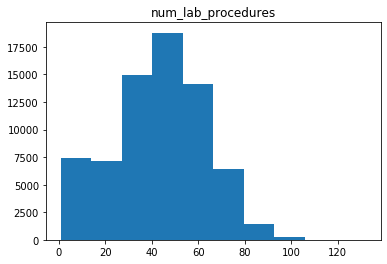

In [152]:
%matplotlib inline
ax=Diabetic_data.hist(column='num_lab_procedures',grid=False)


### Distribution of time in hospital

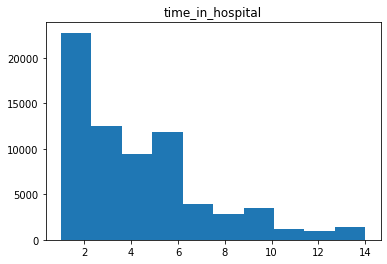

In [153]:
ax=Diabetic_data.hist(column='time_in_hospital',grid=False)

### Distribution of medication number

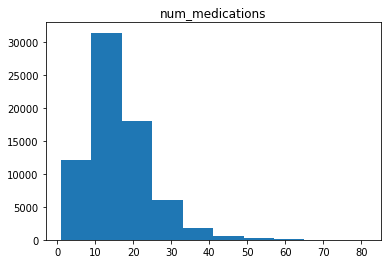

In [154]:
ax=Diabetic_data.hist(column='num_medications',grid=False)

### Remove outliers of 'time_in_hospital','num_lab_procedures','num_medications' based on IQR

In [155]:
Q1 = Diabetic_data['time_in_hospital'].quantile(0.25)
Q3 = Diabetic_data['time_in_hospital'].quantile(0.75)
IQR = Q3 - Q1

filter = (Diabetic_data['time_in_hospital'] >= Q1 - 1.5 * IQR) & (Diabetic_data['time_in_hospital'] <= Q3 + 1.5 *IQR)
Diabetic_data=Diabetic_data.loc[filter]
Diabetic_data.shape


(69057, 45)

In [156]:
Q1 = Diabetic_data['num_medications'].quantile(0.25)
Q3 = Diabetic_data['num_medications'].quantile(0.75)
IQR = Q3 - Q1

filter = (Diabetic_data['num_medications'] >= Q1 - 1.5 * IQR) & (Diabetic_data['num_medications'] <= Q3 + 1.5 *IQR)
Diabetic_data=Diabetic_data.loc[filter]
Diabetic_data.shape

(66591, 45)

In [157]:
Q1 = Diabetic_data['num_lab_procedures'].quantile(0.25)
Q3 = Diabetic_data['num_lab_procedures'].quantile(0.75)
IQR = Q3 - Q1

filter = (Diabetic_data['num_lab_procedures'] >= Q1 - 1.5 * IQR) & (Diabetic_data['num_lab_procedures'] <= Q3 + 1.5 *IQR)
Diabetic_data=Diabetic_data.loc[filter]
Diabetic_data.shape

(66500, 45)

### Multivariate analysis 

### Time in hospital and readmission

Text(0.5, 0, 'readmitted')

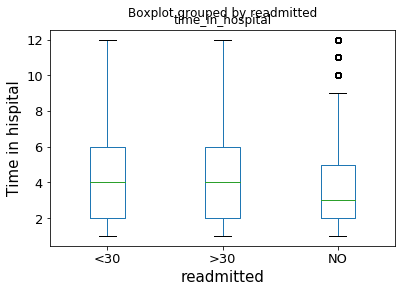

In [158]:
ax=Diabetic_data[['readmitted','time_in_hospital']].boxplot(by='readmitted',grid=False,fontsize=13)
ax.set_ylabel("Time in hispital", fontsize=15)
ax.set_xlabel('readmitted',fontsize=15)

In [159]:
# from matplotlib.ticker import AutoMinorLocator
# fig = plt.figure(figsize=(18,6))
# #LOOKBACK_YEARS = 3
# #REGISTRATION_YEAR = 2017
# #filtered_years = car_data[car_data['firstRegistrationYear'] > REGISTRATION_YEAR - LOOKBACK_YEARS]
# ax1 = sns.violinplot('readmitted', "time_in_hospital", data=Diabetic_data)
# #ax1.minorticks_on()
# #ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# #ax1.grid(which='minor', axis='x', linewidth=1)

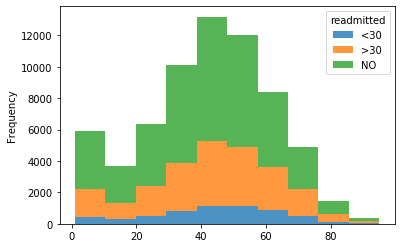

In [160]:
Diabetic_data.pivot(columns='readmitted').num_lab_procedures.plot(kind = 'hist', stacked=True,alpha=0.8)

In [161]:
time_in_hospital_readmission_crosstab=pd.crosstab(Diabetic_data['time_in_hospital'],Diabetic_data['readmitted'],margins=False)
time_in_hospital_readmission_crosstab_percent =time_in_hospital_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
time_in_hospital_readmission_crosstab_percent

readmitted,<30,>30,NO
time_in_hospital,,,
1,6.390049,27.962400,65.647550
2,7.568544,30.109998,62.321458
3,8.040688,30.604666,61.354646
4,8.795142,33.044138,58.160720
5,9.671420,32.594544,57.734036
6,10.517564,33.090834,56.391603
7,11.441266,33.351847,55.206887
8,12.194159,34.214680,53.591160
9,11.953353,33.994169,54.052478


In [162]:
time_in_hospital_readmission_crosstab = pd.crosstab(
    Diabetic_data['time_in_hospital'],
    Diabetic_data['readmitted'],
    margins = False
)
time_in_hospital_readmission_crosstab
time_in_hospital_readmission_crosstab_percent =time_in_hospital_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
time_in_hospital_readmission_crosstab_percent

readmitted,<30,>30,NO
time_in_hospital,,,
1,6.390049,27.962400,65.647550
2,7.568544,30.109998,62.321458
3,8.040688,30.604666,61.354646
4,8.795142,33.044138,58.160720
5,9.671420,32.594544,57.734036
6,10.517564,33.090834,56.391603
7,11.441266,33.351847,55.206887
8,12.194159,34.214680,53.591160
9,11.953353,33.994169,54.052478


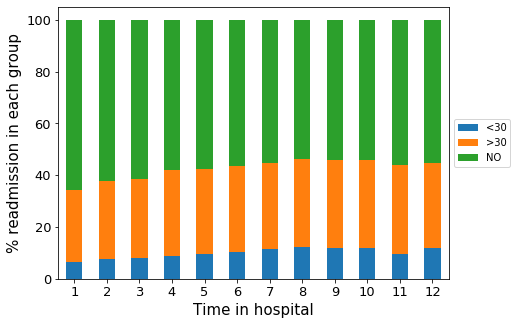

In [163]:
ax = time_in_hospital_readmission_crosstab_percent.plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Time in hospital',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [164]:
diabetic_readmitted=Diabetic_data[Diabetic_data['readmitted']=='<30']
diabetic_non_readmitted=Diabetic_data[Diabetic_data['readmitted']=='NO']

In [165]:
print ('Time in hospital and readmission')
stats.ttest_ind(diabetic_readmitted['time_in_hospital'],diabetic_non_readmitted['time_in_hospital'])

Time in hospital and readmission


Ttest_indResult(statistic=17.271807937146274, pvalue=1.2499456478586623e-66)

### Number of lab procedures and readmission

Text(0.5, 0, 'readmitted')

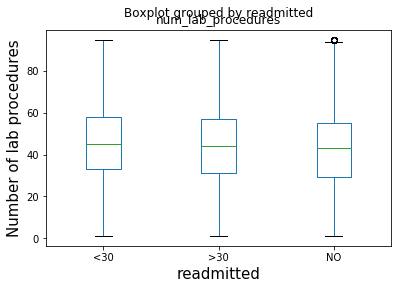

In [166]:
ax=Diabetic_data[['readmitted','num_lab_procedures']].boxplot(by='readmitted',grid=False)
ax.set_ylabel("Number of lab procedures", fontsize=15)
ax.set_xlabel('readmitted',fontsize=15)


In [167]:
print ('num_lab_procedures and readmission')
stats.ttest_ind(diabetic_readmitted['num_lab_procedures'],diabetic_non_readmitted['num_lab_procedures'])

num_lab_procedures and readmission


Ttest_indResult(statistic=9.530613118385904, pvalue=1.6373359256268074e-21)

### num_medications and readmission

Text(0.5, 0, 'readmitted')

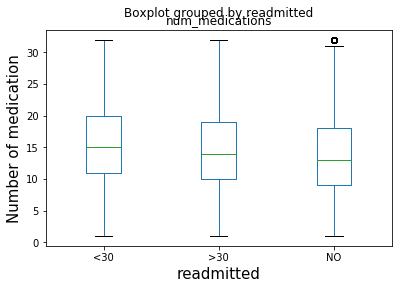

In [168]:
ax=Diabetic_data[['readmitted','num_medications']].boxplot(by='readmitted',grid=False)
ax.set_ylabel("Number of medication", fontsize=15)
ax.set_xlabel('readmitted',fontsize=15)
#ax.set_yticks([0,10,20,30,40])

In [169]:
print ('num_medications and readmission')
stats.ttest_ind(diabetic_readmitted['num_medications'],diabetic_non_readmitted['num_medications'])

num_medications and readmission


Ttest_indResult(statistic=12.441635423246655, pvalue=1.7730602052039678e-35)

### Corrleation between numeric variables

In [170]:
Diabetic_data.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.297760,0.106834,0.411496,-0.012137,-0.005224,0.064868,0.222220
num_lab_procedures,0.297760,1.000000,-0.011649,0.212017,-0.005741,0.018728,0.084315,0.142711
num_procedures,0.106834,-0.011649,1.000000,0.292172,-0.014685,-0.031108,-0.022676,0.067972
num_medications,0.411496,0.212017,0.292172,1.000000,0.047340,0.017867,0.057101,0.279509
number_outpatient,-0.012137,-0.005741,-0.014685,0.047340,1.000000,0.095238,0.067331,0.078815
number_emergency,-0.005224,0.018728,-0.031108,0.017867,0.095238,1.000000,0.146163,0.050660
number_inpatient,0.064868,0.084315,-0.022676,0.057101,0.067331,0.146163,1.000000,0.069946
number_diagnoses,0.222220,0.142711,0.067972,0.279509,0.078815,0.050660,0.069946,1.000000


In [171]:
#Hospitalization_categorical_feature=['num_procedures','number_outpatient','number_inpatient','number_emergency','admission_type','discharge_disposition','admission_source']

### Data distribution of number of procedure

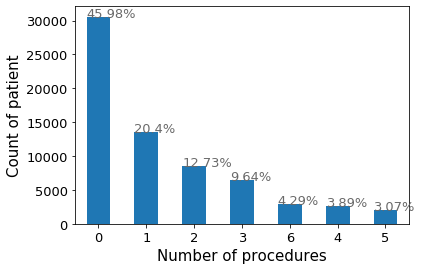

In [172]:
%matplotlib inline
ax = Diabetic_data['num_procedures'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Number of procedures", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

### Data distribution of number of emergency



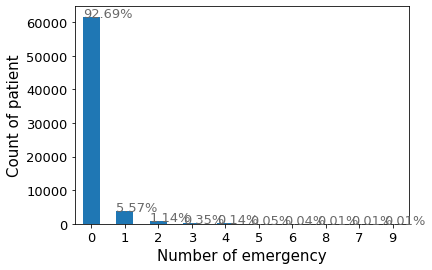

In [173]:
%matplotlib inline
ax = Diabetic_data[Diabetic_data['number_emergency']<10]['number_emergency'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Number of emergency", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

### Data distribution of number of outpatient

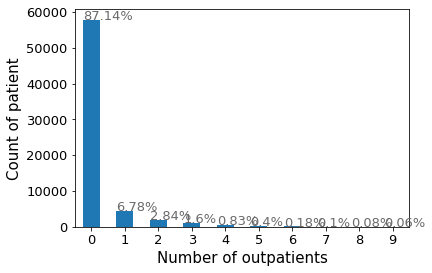

In [174]:
%matplotlib inline
ax = Diabetic_data[Diabetic_data['number_outpatient']<10]['number_outpatient'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Number of outpatients", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

### Data distribution of number of inpatient

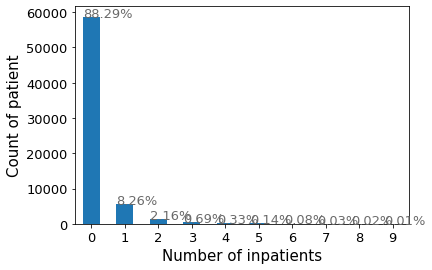

In [175]:
%matplotlib inline
ax = Diabetic_data[Diabetic_data['number_inpatient']<10]['number_inpatient'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=0);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Number of inpatients", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

In [176]:
Diabetic_data.admission_type.replace(np.nan,'UNK',regex = True,inplace=True)
Diabetic_data.groupby('admission_type').size()

admission_type
Elective          8918
Emergency        25581
Newborn              3
Trauma Center       10
UNK              22370
Urgent            9618
dtype: int64

### Data distribution of admission type

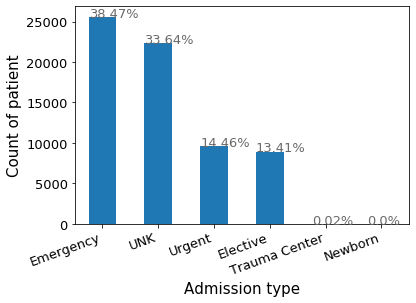

In [177]:
ax = Diabetic_data['admission_type'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=20);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_xlabel('Admission type', fontsize=15);
ax.set_ylabel("Count of patient", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

### Data distribution of admission source

In [178]:
Diabetic_data.admission_source=Diabetic_data.admission_source.str.strip()
Diabetic_data.admission_source.replace(np.nan,'UNK',regex = True,inplace=True)
Diabetic_data.admission_source.replace('Not Mapped','UNK',regex = True,inplace=True)
Diabetic_data.admission_source.replace(' UNK','UNK',regex = True,inplace=True)
Diabetic_data.admission_source.replace({'|'.join(['Physician Referral','Clinic Referral','HMO Referral',' Referral','Referral']):'Referral'},regex=True,inplace=True)
Diabetic_data.admission_source.replace({'|'.join(['Transfer from a Skilled Nursing Facility (SNF)','Transfer from another health care facility','Transfer from a hospital','Transfer from Ambulatory Surgery Center','Transfer from another provider']):'Transfer from another provider'},regex=True,inplace=True)
Diabetic_data.loc[Diabetic_data.admission_source=='Transfer from a Skilled Nursing Facility (SNF)','admission_source']='Transfer from another provider'
Diabetic_data.groupby('admission_source').size()

admission_source
Emergency Room                    26391
Referral                          15878
Transfer from another provider     3292
UNK                               20939
dtype: int64

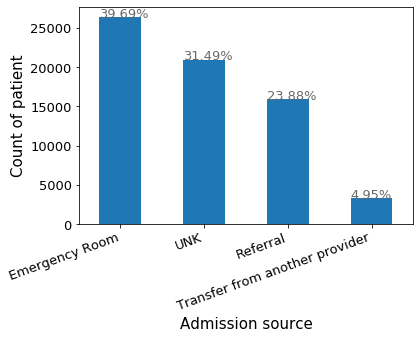

In [179]:
ax = Diabetic_data['admission_source'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=25);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Admission source", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

### Data distribution of dicharge disposition

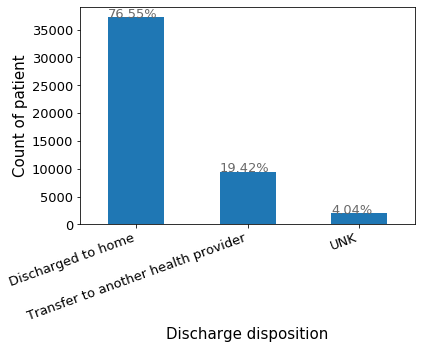

In [180]:
ax = Diabetic_data['discharge_disposition'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=20);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Discharge disposition", fontsize=15);
#ax.set_yticks(['<60','60-80','>80'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey')

In [181]:
#Diabetic_data.groupby('medical_specialty').size().sort_values(ascending=False).head(10)

In [182]:
# Diabetic_data.payer_code.replace(np.nan,'UNK',regex = True,inplace=True)
# Diabetic_data.groupby('payer_code').size().sort_values(ascending=False)

In [183]:
# payer_code_readmission_crosstab=pd.crosstab(Diabetic_data['payer_code'],Diabetic_data['readmitted'],margins=False)
# payer_code_readmission_crosstab_percent=payer_code_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
# # payer_code_readmission_crosstab_percent

### Bivavriate analysis

### num_procedures and readmission

In [184]:
num_procedures_readmission_crosstab=pd.crosstab(Diabetic_data['num_procedures'],Diabetic_data['readmitted'],margins=False)

num_procedures_readmission_crosstab_percent =num_procedures_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
num_procedures_readmission_crosstab_percent

readmitted,<30,>30,NO
num_procedures,,,
0,8.575073,33.152369,58.272558
1,9.360949,29.763396,60.875654
2,8.566702,29.611249,61.822049
3,8.751950,29.001560,62.246490
4,8.999614,30.166087,60.834299
5,8.035277,30.916218,61.048506
6,7.886435,30.914826,61.198738


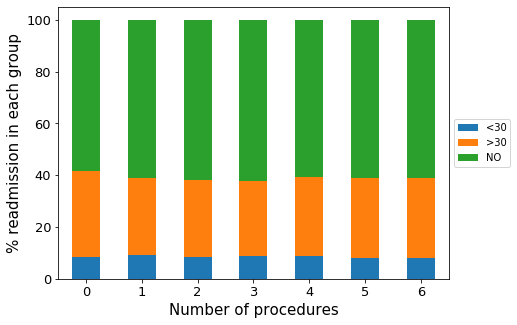

In [185]:
ax = num_procedures_readmission_crosstab_percent.plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Number of procedures',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### number_inpatient and readmission

In [186]:
num_inpatient_readmission_crosstab=pd.crosstab(Diabetic_data['number_inpatient'],Diabetic_data['readmitted'],margins=False)
num_inpatient_readmission_crosstab_percent =num_inpatient_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
num_inpatient_readmission_crosstab_percent

readmitted,<30,>30,NO
number_inpatient,,,
0,7.878778,29.658274,62.462948
1,12.670672,42.180958,45.148371
2,17.725052,47.173761,35.101186
3,22.875817,47.712418,29.411765
4,22.935780,53.669725,23.394495
5,29.166667,52.083333,18.750000
6,39.215686,50.980392,9.803922
7,47.368421,42.105263,10.526316
8,25.000000,58.333333,16.666667


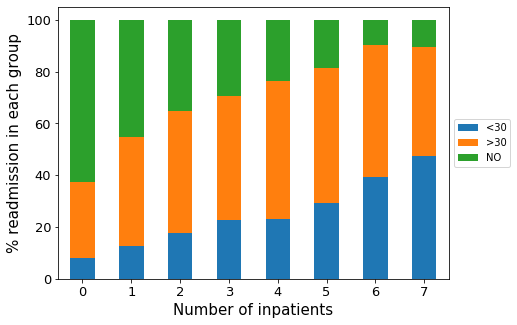

In [187]:
ax = num_inpatient_readmission_crosstab_percent[0:8].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Number of inpatients',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### number_outpatient and readmission

In [188]:
num_outpatient_readmission_crosstab=pd.crosstab(Diabetic_data['number_outpatient'],Diabetic_data['readmitted'],margins=False)
num_outpatient_readmission_crosstab_percent =num_outpatient_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
num_outpatient_readmission_crosstab_percent

readmitted,<30,>30,NO
number_outpatient,,,
0,8.544555,29.918047,61.537398
1,10.173256,40.226566,49.600178
2,9.776833,41.392136,48.831031
3,8.498584,40.037771,51.463645
4,11.070780,39.927405,49.001815
5,10.074627,42.164179,47.761194
6,9.401709,43.589744,47.008547
7,10.447761,50.746269,38.805970
8,5.357143,35.714286,58.928571


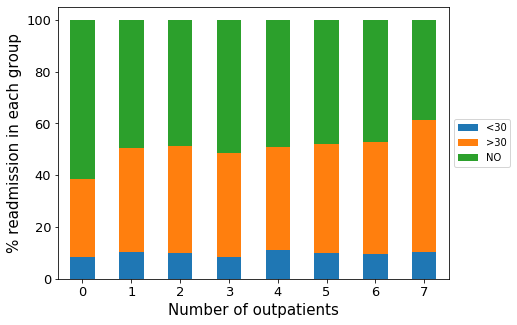

In [189]:
ax = num_outpatient_readmission_crosstab_percent[0:8].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Number of outpatients',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### number_emergency and readmission

In [190]:
num_emergency_readmission_crosstab=pd.crosstab(Diabetic_data['number_emergency'],Diabetic_data['readmitted'],margins=False)
num_emergency_readmission_crosstab_percent =num_emergency_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
num_emergency_readmission_crosstab_percent[0:9]

readmitted,<30,>30,NO
number_emergency,,,
0,8.471799,30.357954,61.170247
1,11.123110,41.765659,47.111231
2,13.377483,48.476821,38.145695
3,12.068966,50.000000,37.931034
4,23.913043,50.000000,26.086957
5,16.129032,54.838710,29.032258
6,25.000000,50.000000,25.000000
7,12.500000,75.000000,12.500000
8,22.222222,44.444444,33.333333


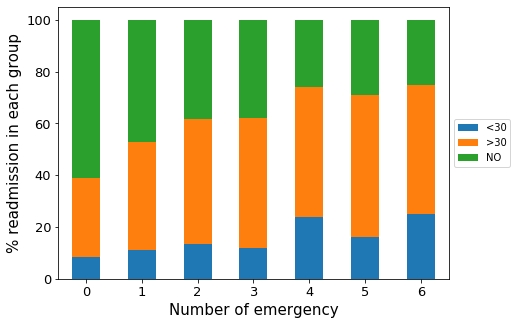

In [191]:
ax = num_emergency_readmission_crosstab_percent[0:7].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Number of emergency',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### admission type and readmission

In [192]:
admission_type_readmission_crosstab=pd.crosstab(Diabetic_data['admission_type'],Diabetic_data['readmitted'],margins=False)
admission_type_readmission_crosstab_percent =admission_type_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
admission_type_readmission_crosstab_percent

readmitted,<30,>30,NO
admission_type,,,
Elective,8.836062,36.588921,54.575017
Emergency,9.475783,30.682929,59.841288
Newborn,0.000000,33.333333,66.666667
Trauma Center,20.000000,60.000000,20.000000
UNK,7.237371,26.486366,66.276263
Urgent,10.054065,39.405282,50.540653


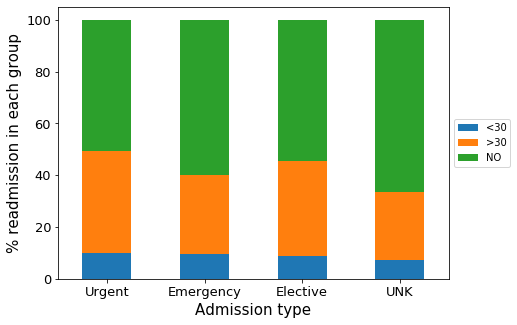

In [193]:
ax = admission_type_readmission_crosstab_percent.loc[~admission_type_readmission_crosstab_percent.index.isin(['Newborn','Trauma Center'])].sort_values('<30',ascending=False).plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=0,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Admission type',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### admission source and readmission

In [194]:
admission_source_readmission_crosstab=pd.crosstab(Diabetic_data['admission_source'],Diabetic_data['readmitted'],margins=False)
admission_source_readmission_crosstab_percent =admission_source_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
admission_source_readmission_crosstab_percent

readmitted,<30,>30,NO
admission_source,,,
Emergency Room,9.453981,35.288545,55.257474
Referral,9.648570,32.919763,57.431666
Transfer from another provider,8.626974,25.820170,65.552855
UNK,7.111132,25.999331,66.889536


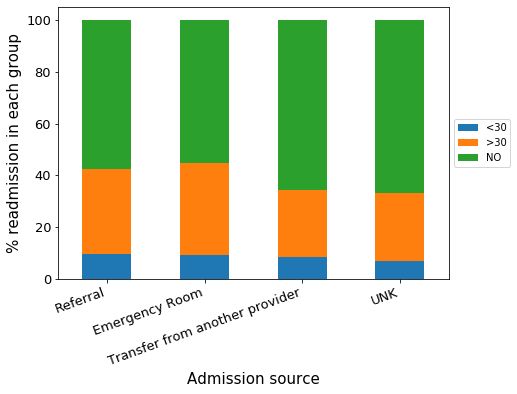

In [195]:
ax = admission_source_readmission_crosstab_percent.sort_values('<30',ascending=False).plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=20,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Admission source',fontsize=15);
#ax.set_yticks([0.0,2.0,4.0,6.0,8.0,10.0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Discharge disposition and readmission

In [196]:
discharge_readmission_crosstab=pd.crosstab(Diabetic_data['discharge_disposition'],Diabetic_data['readmitted'],margins=False)
discharge_readmission_crosstab_percent=discharge_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
discharge_readmission_crosstab_percent

readmitted,<30,>30,NO
discharge_disposition,,,
Discharged to home,9.469697,32.607995,57.922308
Transfer to another health provider,9.383605,38.890066,51.726329
UNK,8.553971,33.706721,57.739308


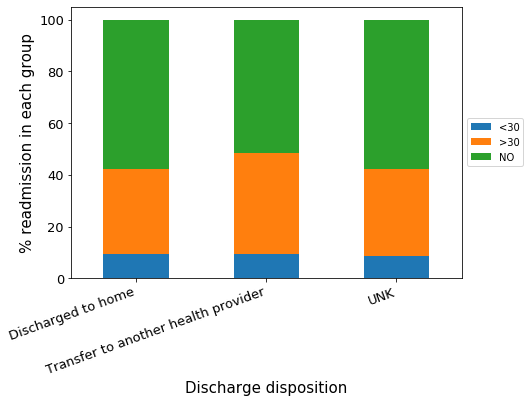

In [197]:
ax = discharge_readmission_crosstab_percent.sort_values('<30',ascending=False).plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Discharge disposition',fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 3. Diagnosis 

In [198]:
Diagnosis_feature=['diag_1','diag_2','diag_3','number_diagnoses']

### Data distribution of diag_1

### Group diagnosis into groups

In [199]:
Diabetic_data.diag_1.replace(np.nan,'0',regex = True,inplace=True)
Diabetic_data.loc[Diabetic_data['diag_1'].str.contains('V'),'diag_1_group']='Other'
Diabetic_data.loc[Diabetic_data['diag_1'].str.contains('E'),'diag_1_group']='Other'
Diabetic_data.loc[(Diabetic_data['diag_1_group']!='other') & (Diabetic_data['diag_1'].str.contains('250')),'diag_1_group']='Diabetes'

In [200]:
Diabetic_data.groupby('diag_1_group').size()

diag_1_group
Diabetes    5500
Other        815
dtype: int64

In [201]:
Diabetic_diag_1=pd.DataFrame(Diabetic_data[Diabetic_data['diag_1_group'].isna()]['diag_1'].unique())
Diabetic_diag_1.columns=['diag_1']
Diabetic_diag_1['diag_1_group']=''
Diabetic_diag_1.loc[((Diabetic_diag_1['diag_1'].astype(int)>=390) & (Diabetic_diag_1['diag_1'].astype(int)<=459)) | (Diabetic_diag_1['diag_1'].astype(int)==785),['diag_1_group']]='Circulatory'
Diabetic_diag_1.loc[((Diabetic_diag_1['diag_1'].astype(int)>=460) & (Diabetic_diag_1['diag_1'].astype(int)<=519)) | (Diabetic_diag_1['diag_1'].astype(int)==786),['diag_1_group']]='Respiratory'
Diabetic_diag_1.loc[((Diabetic_diag_1['diag_1'].astype(int)>=520) & (Diabetic_diag_1['diag_1'].astype(int)<=579)) | (Diabetic_diag_1['diag_1'].astype(int)==787),['diag_1_group']]='Digestive'
Diabetic_diag_1.loc[(Diabetic_diag_1['diag_1'].astype(int)>=800) & (Diabetic_diag_1['diag_1'].astype(int)<=999),['diag_1_group']]='Injury'
Diabetic_diag_1.loc[(Diabetic_diag_1['diag_1'].astype(int)>=710) & (Diabetic_diag_1['diag_1'].astype(int)<=739),['diag_1_group']]='Musculoskeletal'
Diabetic_diag_1.loc[((Diabetic_diag_1['diag_1'].astype(int)>=580) & (Diabetic_diag_1['diag_1'].astype(int)<=629)) | (Diabetic_diag_1['diag_1'].astype(int)==788),['diag_1_group']]='Genitourinary'
Diabetic_diag_1.loc[(Diabetic_diag_1['diag_1'].astype(int)>=140) & (Diabetic_diag_1['diag_1'].astype(int)<=239),['diag_1_group']]='Neoplasms'
Diabetic_diag_1.diag_1_group.replace('','Other',regex = True,inplace=True)


In [202]:
Diabetic_diag_1.sort_values('diag_1_group')
Diabetic_diag_1.groupby('diag_1_group').size()

diag_1_group
Circulatory         57
Digestive           45
Genitourinary       41
Injury             128
Musculoskeletal     26
Neoplasms           76
Other              227
Respiratory         41
dtype: int64

In [203]:
Diabetic_data=pd.merge(Diabetic_data,Diabetic_diag_1,how='left',on='diag_1')
Diabetic_data['diag_1_group'] = Diabetic_data['diag_1_group_x'].fillna(Diabetic_data['diag_1_group_y'])

In [204]:
Diabetic_data['diag_1_group'] = Diabetic_data['diag_1_group_x'].fillna(Diabetic_data['diag_1_group_y'])

In [205]:
Diabetic_data.drop(columns=['diag_1_group_x','diag_1_group_y'],inplace=True)
Diabetic_data.shape

(66500, 46)

In [206]:
Diabetic_data.groupby('diag_1_group').size()

diag_1_group
Circulatory        19783
Diabetes            5500
Digestive           6225
Genitourinary       3354
Injury              4447
Musculoskeletal     3753
Neoplasms           2465
Other              11656
Respiratory         9317
dtype: int64

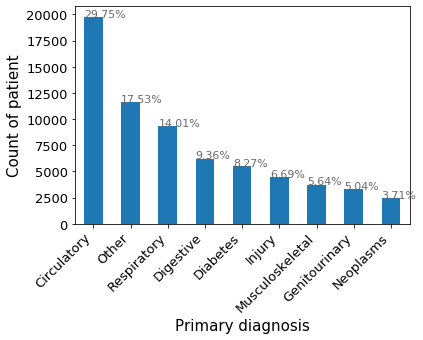

In [207]:
ax = Diabetic_data['diag_1_group'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Primary diagnosis", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')
    

### Data distrbution of number_diagnoses

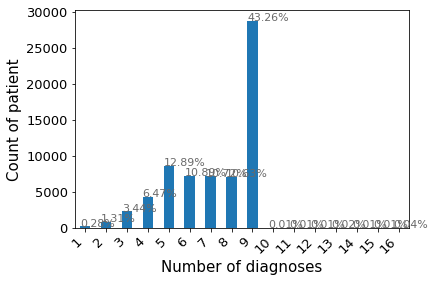

In [208]:
ax = Diabetic_data['number_diagnoses'].value_counts().sort_index().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Number of diagnoses", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

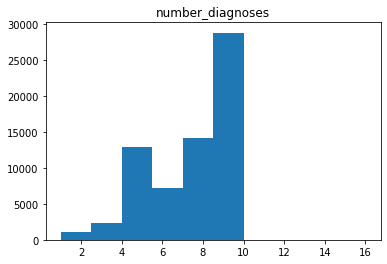

In [209]:
%matplotlib inline
ax=Diabetic_data.hist(column='number_diagnoses',grid=False)

### Multivariate analysis

### Primary diagnosis and readmission

In [210]:
diagnosis_readmission_crosstab=pd.crosstab(Diabetic_data['diag_1_group'],Diabetic_data['readmitted'],margins=False)
diagnosis_readmission_crosstab_percent=diagnosis_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
diagnosis_readmission_crosstab_percent

readmitted,<30,>30,NO
diag_1_group,,,
Circulatory,9.417176,33.053632,57.529192
Diabetes,8.800000,33.327273,57.872727
Digestive,7.967871,31.261044,60.771084
Genitourinary,8.825283,29.159213,62.015504
Injury,10.726332,27.883967,61.389701
Musculoskeletal,8.206768,27.045031,64.748201
Neoplasms,8.235294,21.825558,69.939148
Other,8.785175,30.319149,60.895676
Respiratory,6.965762,34.463883,58.570355


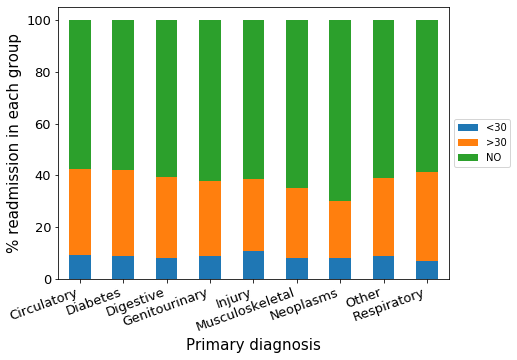

In [211]:
ax = diagnosis_readmission_crosstab_percent.plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('Primary diagnosis',fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [212]:
num_diagnosis_readmission_crosstab=pd.crosstab(Diabetic_data['number_diagnoses'],Diabetic_data['readmitted'],margins=False)
num_diagnosis_readmission_crosstab_percent=num_diagnosis_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
num_diagnosis_readmission_crosstab_percent.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64', name='number_diagnoses')

### number_diagnoses and readmission

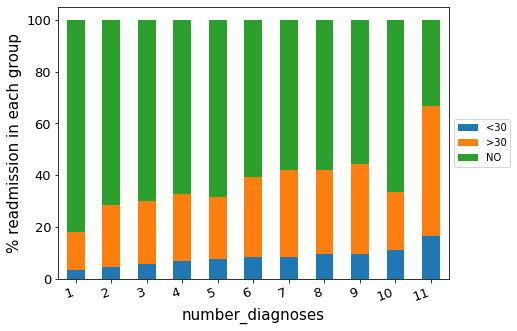

In [213]:
ax = num_diagnosis_readmission_crosstab_percent[:11].plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("% readmission in each group", fontsize=15)
ax.set_xlabel('number_diagnoses',fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 4. Diabetic related lab measurement

### Data distribution of glucose serum measurement

C:\Users\yafen\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


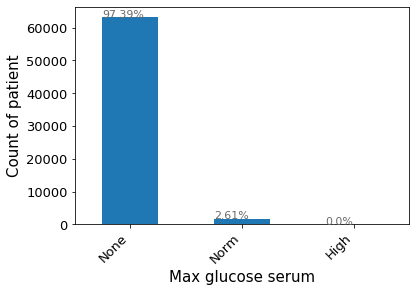

In [214]:
ax = Diabetic_data['max_glu_serum'].value_counts()[['None','Norm','High']].plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Max glucose serum", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

### Data distribution of A1C result

In [215]:
Diabetic_data.loc[Diabetic_data['A1Cresult'].isin(['>7','>8']),['A1Cresult']]='High'

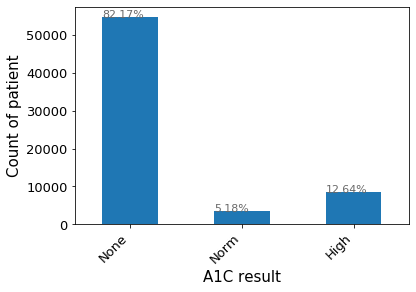

In [216]:
ax = Diabetic_data['A1Cresult'].value_counts()[['None','Norm','High']].plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("A1C result", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

### Data distribution of medication change

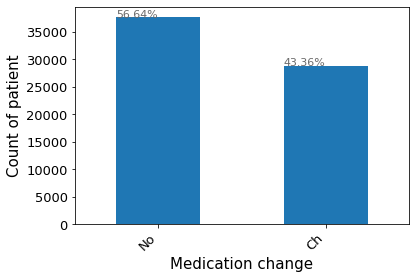

In [217]:
ax = Diabetic_data['change'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Medication change", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

### Data distribution of diabetesMed

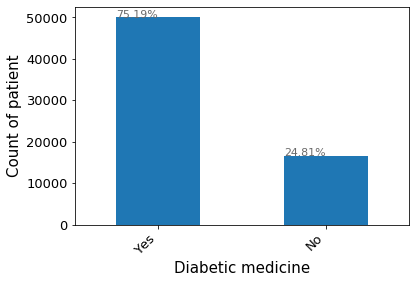

In [218]:
ax = Diabetic_data['diabetesMed'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("Diabetic medicine", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

In [219]:
med_change_crosstab=pd.crosstab(Diabetic_data['diabetesMed'],Diabetic_data['change'],margins=False)
med_change_crosstab_percent =med_change_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
med_change_crosstab

change,Ch,No
diabetesMed,,
No,0,16497
Yes,28835,21168


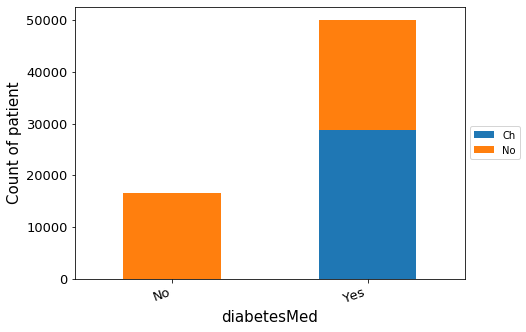

In [220]:
ax = med_change_crosstab.plot(kind='bar',
                                              figsize=(7,5),
                                              #  color="blue", 
                                              fontsize=13,rot=30,stacked=True);
ax.set_alpha(0.8)
#ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Count of patient", fontsize=15)
ax.set_xlabel('diabetesMed',fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Create new feature of A1Ctaken

In [221]:
Diabetic_data.loc[Diabetic_data['A1Cresult']=='None','A1Ctaken']=0
Diabetic_data.loc[Diabetic_data['A1Cresult']!='None','A1Ctaken']=1

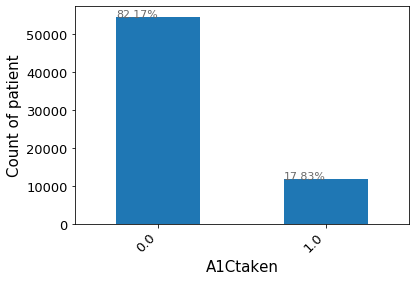

In [222]:
ax = Diabetic_data['A1Ctaken'].value_counts().plot(kind='bar',
                                              #figsize=(7,6),
                                              #  color="blue", 
                                              fontsize=13,
                                                rot=30);
ax.set_alpha(0.8)
#ax.set_title("Where twere the battles fought?", fontsize=18)
ax.set_ylabel('Count of patient', fontsize=15);
ax.set_xlabel("A1Ctaken", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='dimgrey')

# Multivariate analysis

## A1C

### A1C and readmission

In [223]:
A1Cresult_readmission_crosstab=pd.crosstab(Diabetic_data['A1Cresult'],Diabetic_data['readmitted'],margins=False)
A1Cresult_readmission_crosstab_percent=A1Cresult_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
A1Cresult_readmission_crosstab_percent

readmitted,<30,>30,NO
A1Cresult,,,
High,7.875327,30.870807,61.253866
None,8.849687,31.623541,59.526772
Norm,8.758701,27.784223,63.457077


In [224]:
A1Cresult_readmission_crosstab=pd.crosstab(Diabetic_data[Diabetic_data.readmitted!='>30']['A1Cresult'],Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'],margins=False)
A1Cresult_readmission_crosstab_percent=A1Cresult_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
A1Cresult_readmission_crosstab_percent

readmitted,<30,NO
A1Cresult,,
High,11.392187,88.607813
None,12.942593,87.057407
Norm,12.128514,87.871486


### primary diagnosis , A1C and readmission

In [225]:
Diag_A1Cresult_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['A1Cresult']
                                                      ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_A1Cresult_admission_crosstab_percent=Diag_A1Cresult_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_A1Cresult_admission_crosstab_percent

readmitted                       <30         NO
diag_1_group    A1Cresult                      
Circulatory     High       14.585764  85.414236
                None       13.951763  86.048237
                Norm       14.533333  85.466667
Diabetes        High        8.888889  91.111111
                None       15.313734  84.686266
                Norm       14.220183  85.779817
Digestive       High       10.027855  89.972145
                None       11.736334  88.263666
                Norm       11.702128  88.297872
Genitourinary   High       13.483146  86.516854
                None       12.257100  87.742900
                Norm       13.725490  86.274510
Injury          High       12.000000  88.000000
                None       15.507452  84.492548
                Norm        7.926829  92.073171
Musculoskeletal High       12.903226  87.096774
                None       11.174319  88.825681
                Norm        9.890110  90.109890
Neoplasms       High        9.345794  90.654206
                None       10.550199  89.449801
                Norm       12.280702  87.719298
Other           High       10.984456  89.015544
                None       12.782976  87.217024
                Norm       13.370998  86.629002
Respiratory     High        8.435208  91.564792
                None       11.308430  88.691570
                Norm        6.683805  93.316195

In [226]:
Diag_A1Cresult_admission_crosstab_percent.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\A1C and readmission, diagnosis crosstab.csv')

### Create new feature A1Ctaken

In [227]:
Diabetic_data.loc[Diabetic_data['A1Cresult']!='None','A1Ctaken']=1
Diabetic_data.loc[Diabetic_data['A1Cresult']=='None','A1Ctaken']=0

### A1C taken per each primary diagnosis

In [228]:
Diag_A1Ctaken_crosstab=pd.crosstab(Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['A1Ctaken'])
                                                                   
Diag_A1Ctaken_crosstab                                                                   
Diag_A1Ctaken_crosstab_percent=Diag_A1Ctaken_crosstab.apply(lambda r: r/r.sum(), axis=1)*100  
Diag_A1Ctaken_crosstab_percent

A1Ctaken,0.0,1.0
diag_1_group,,
Circulatory,81.395349,18.604651
Diabetes,62.148896,37.851104
Digestive,87.216639,12.783361
Genitourinary,84.469697,15.530303
Injury,87.870284,12.129716
Musculoskeletal,89.883126,10.116874
Neoplasms,91.489362,8.510638
Other,81.580891,18.419109
Respiratory,80.232558,19.767442


### A1C taken and readmission

In [229]:
A1Ctaken_readmission_crosstab=pd.crosstab(Diabetic_data[Diabetic_data.readmitted!='>30']['A1Ctaken'],Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'],margins=False)
A1Ctaken_readmission_crosstab_percent=A1Ctaken_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100
A1Ctaken_readmission_crosstab_percent

readmitted,<30,NO
A1Ctaken,,
0.0,12.942593,87.057407
1.0,11.613059,88.386941


### Diagnosis, A1C taken and readmission

In [230]:
Diag_A1Ctaken_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['A1Ctaken']
                                                      ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_A1Ctaken_admission_crosstab_percent=Diag_A1Ctaken_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_A1Ctaken_admission_crosstab_percent

readmitted                      <30         NO
diag_1_group    A1Ctaken                      
Circulatory     0.0       13.951763  86.048237
                1.0       14.569805  85.430195
Diabetes        0.0       15.313734  84.686266
                1.0        9.726225  90.273775
Digestive       0.0       11.736334  88.263666
                1.0       10.603291  89.396709
Genitourinary   0.0       12.257100  87.742900
                1.0       13.550136  86.449864
Injury          0.0       15.507452  84.492548
                1.0       10.282776  89.717224
Musculoskeletal 0.0       11.174319  88.825681
                1.0       11.913357  88.086643
Neoplasms       0.0       10.550199  89.449801
                1.0       10.365854  89.634146
Other           0.0       12.782976  87.217024
                1.0       11.831551  88.168449
Respiratory     0.0       11.308430  88.691570
                1.0        7.870754  92.129246

In [267]:
Diag_A1Ctaken_admission_crosstab

readmitted                 <30    NO
diag_1_group    A1Ctaken            
Circulatory     0.0       1504  9276
                1.0        359  2105
Diabetes        0.0        349  1930
                1.0        135  1253
Digestive       0.0        438  3294
                1.0         58   489
Genitourinary   0.0        246  1761
                1.0         50   319
Injury          0.0        437  2381
                1.0         40   349
Musculoskeletal 0.0        275  2186
                1.0         33   244
Neoplasms       0.0        186  1577
                1.0         17   147
Other           0.0        847  5779
                1.0        177  1319
Respiratory     0.0        554  4345
                1.0         95  1112

In [268]:
Diag_A1Ctaken_admission_crosstab.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\Diag_A1Ctaken_admission_crosstab.csv')

# Medication

### Diabete medication and readmission

In [231]:
diabetesMed_readmission_crosstab = pd.crosstab(
    Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
    Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'],
    margins = False
)

                                                                   
diabetesMed_readmission_crosstab_percent=diabetesMed_readmission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
diabetesMed_readmission_crosstab_percent

readmitted,<30,NO
diabetesMed,,
No,10.045662,89.954338
Yes,13.652182,86.347818


In [232]:
diabetesMed_change_crosstab = pd.crosstab(
    Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
    Diabetic_data[Diabetic_data.readmitted!='>30']['change'],
    margins = False
)

                                                                   
diabetesMed_change_crosstab_percent=diabetesMed_change_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
diabetesMed_change_crosstab_percent

change,Ch,No
diabetesMed,,
No,0.000000,100.000000
Yes,57.232087,42.767913


In [233]:
diabetesMed_change_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change']      ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
diabetesMed_change_admission_crosstab_percent=diabetesMed_change_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
diabetesMed_change_admission_crosstab_percent

readmitted                <30         NO
diabetesMed change                      
No          No      10.045662  89.954338
Yes         Ch      13.782351  86.217649
            No      13.477989  86.522011

### A1C result, diabete medication and readmission

In [234]:
A1Cresult_diabetesMed_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                      Diabetic_data[Diabetic_data.readmitted!='>30']['A1Ctaken']],             
                                                      Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
A1Cresult_diabetesMed_admission_crosstab_percent=A1Cresult_diabetesMed_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
A1Cresult_diabetesMed_admission_crosstab_percent

readmitted                  <30         NO
diabetesMed A1Ctaken                      
No          0.0       10.064158  89.935842
            1.0        9.925094  90.074906
Yes         0.0       14.059134  85.940866
            1.0       12.016719  87.983281

### Primary diagnosis, medication change and readmission

In [235]:
Diag_Med_change_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change']      ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_Med_change_admission_crosstab_percent=Diag_Med_change_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_Med_change_admission_crosstab_percent=Diag_Med_change_admission_crosstab_percent.sort_values(['diag_1_group','diabetesMed','change'],ascending=[True,False,True])
Diag_Med_change_admission_crosstab_percent

readmitted                                <30         NO
diag_1_group    diabetesMed change                      
Circulatory     Yes         Ch      15.719626  84.280374
                            No      14.768806  85.231194
                No          No      10.713279  89.286721
Diabetes        Yes         Ch      12.587413  87.412587
                            No      13.127413  86.872587
                No          No      16.049383  83.950617
Digestive       Yes         Ch      12.744332  87.255668
                            No      13.058659  86.941341
                No          No       9.311224  90.688776
Genitourinary   Yes         Ch      14.315789  85.684211
                            No      13.246753  86.753247
                No          No       8.841463  91.158537
Injury          Yes         Ch      16.511794  83.488206
                            No      16.422594  83.577406
                No          No      10.446009  89.553991
Musculoskeletal Yes         Ch      11.622465  88.377535
                            No      12.218268  87.781732
                No          No       9.135400  90.864600
Neoplasms       Yes         Ch      12.653061  87.346939
                            No      11.035654  88.964346
                No          No       7.462687  92.537313
Other           Yes         Ch      13.474551  86.525449
                            No      13.017516  86.982484
                No          No      10.809588  89.190412
Respiratory     Yes         Ch      11.505734  88.494266
                            No      11.562830  88.437170
                No          No       7.886017  92.113983

In [236]:
Diag_Med_change_admission_crosstab_percent.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\Diag_Med_change_admission_crosstab_percent.csv')

### create new feature dosage_up, dosage_down

In [237]:
Diabetic_data.columns
drug=[ 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [238]:
for index in Diabetic_data.index:
    dosage_up=sum(list((map(lambda x: Diabetic_data.iloc[index,:][x]=='Up', drug) )))
    dosage_down=sum(list((map(lambda x: Diabetic_data.iloc[index,:][x]=='Down', drug) )))
    if dosage_up>0:
        Diabetic_data.loc[index,'dosage_up']=1
    else:
        Diabetic_data.loc[index,'dosage_up']=0
     
    if dosage_down>0:
        Diabetic_data.loc[index,'dosage_down']=1
    else:
        Diabetic_data.loc[index,'dosage_down']=0    
    
    

In [239]:
Diag_change_dosage_up_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change'],  
                                           Diabetic_data[Diabetic_data.readmitted!='>30']['dosage_up']
                                           ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_change_dosage_up_admission_crosstab_percent=Diag_change_dosage_up_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_change_dosage_up_admission_crosstab_percent

readmitted                                          <30         NO
diag_1_group    diabetesMed change dosage_up                      
Circulatory     No          No     0.0        10.713279  89.286721
                Yes         Ch     0.0        15.101838  84.898162
                                   1.0        17.598187  82.401813
                            No     0.0        14.768806  85.231194
Diabetes        No          No     0.0        16.049383  83.950617
                Yes         Ch     0.0        13.611756  86.388244
                                   1.0        11.032864  88.967136
                            No     0.0        13.127413  86.872587
Digestive       No          No     0.0         9.311224  90.688776
                Yes         Ch     0.0        12.121212  87.878788
                                   1.0        14.366197  85.633803
                            No     0.0        13.058659  86.941341
Genitourinary   No          No     0.0         8.841463  91.158537
                Yes         Ch     0.0        13.670134  86.329866
                                   1.0        15.884477  84.115523
                            No     0.0        13.246753  86.753247
Injury          No          No     0.0        10.446009  89.553991
                Yes         Ch     0.0        16.538462  83.461538
                                   1.0        16.434540  83.565460
                            No     0.0        16.422594  83.577406
Musculoskeletal No          No     0.0         9.135400  90.864600
                Yes         Ch     0.0        11.834320  88.165680
                                   1.0        10.820896  89.179104
                            No     0.0        12.218268  87.781732
Neoplasms       No          No     0.0         7.462687  92.537313
                Yes         Ch     0.0        11.229947  88.770053
                                   1.0        17.241379  82.758621
                            No     0.0        11.035654  88.964346
Other           No          No     0.0        10.809588  89.190412
                Yes         Ch     0.0        12.842942  87.157058
                                   1.0        15.271493  84.728507
                            No     0.0        13.017516  86.982484
Respiratory     No          No     0.0         7.886017  92.113983
                Yes         Ch     0.0        11.770780  88.229220
                                   1.0        10.835509  89.164491
                            No     0.0        11.562830  88.437170

In [240]:
Diag_change_dosage_down_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change'],  
                                           Diabetic_data[Diabetic_data.readmitted!='>30']['dosage_down']
                                           ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_change_dosage_down_admission_crosstab_percent=Diag_change_dosage_down_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_change_dosage_down_admission_crosstab_percent

readmitted                                            <30         NO
diag_1_group    diabetesMed change dosage_down                      
Circulatory     No          No     0.0          10.713279  89.286721
                Yes         Ch     0.0          14.933932  85.066068
                                   1.0          18.073189  81.926811
                            No     0.0          14.768806  85.231194
Diabetes        No          No     0.0          16.049383  83.950617
                Yes         Ch     0.0          11.481481  88.518519
                                   1.0          14.465409  85.534591
                            No     0.0          13.127413  86.872587
Digestive       No          No     0.0           9.311224  90.688776
                Yes         Ch     0.0          12.686567  87.313433
                                   1.0          12.903226  87.096774
                            No     0.0          13.058659  86.941341
Genitourinary   No          No     0.0           8.841463  91.158537
                Yes         Ch     0.0          12.340426  87.659574
                                   1.0          20.000000  80.000000
                            No     0.0          13.246753  86.753247
Injury          No          No     0.0          10.446009  89.553991
                Yes         Ch     0.0          15.946206  84.053794
                                   1.0          18.156425  81.843575
                            No     0.0          16.422594  83.577406
Musculoskeletal No          No     0.0           9.135400  90.864600
                Yes         Ch     0.0          10.910816  89.089184
                                   1.0          14.912281  85.087719
                            No     0.0          12.218268  87.781732
Neoplasms       No          No     0.0           7.462687  92.537313
                Yes         Ch     0.0          11.886792  88.113208
                                   1.0          14.634146  85.365854
                            No     0.0          11.035654  88.964346
Other           No          No     0.0          10.809588  89.190412
                Yes         Ch     0.0          13.080685  86.919315
                                   1.0          14.497354  85.502646
                            No     0.0          13.017516  86.982484
Respiratory     No          No     0.0           7.886017  92.113983
                Yes         Ch     0.0          10.957552  89.042448
                                   1.0          13.146233  86.853767
                            No     0.0          11.562830  88.437170

In [241]:
Diabetic_data.loc[(Diabetic_data['change']=='Ch')&(Diabetic_data['dosage_up']==1)&(Diabetic_data['dosage_down']==1)].shape

(355, 49)

In [242]:
Diabetic_data.groupby(['change','dosage_up','dosage_down']).size()

change  dosage_up  dosage_down
Ch      0.0        0.0            13376
                   1.0             7482
        1.0        0.0             7622
                   1.0              355
No      0.0        0.0            37665
dtype: int64

In [243]:
Diabetic_data.loc[(Diabetic_data['dosage_up']==1)&(Diabetic_data['dosage_down']==0),'dosage_change']='Up'
Diabetic_data.loc[(Diabetic_data['dosage_up']==0)&(Diabetic_data['dosage_down']==1),'dosage_change']='Down'
Diabetic_data.loc[(Diabetic_data['dosage_up']==1)&(Diabetic_data['dosage_down']==1),'dosage_change']='Up and Down'
Diabetic_data.loc[(Diabetic_data['dosage_up']==0)&(Diabetic_data['dosage_down']==0),'dosage_change']='Steady'

In [244]:

Diag_change_dosage_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change'],  
                                           Diabetic_data[Diabetic_data.readmitted!='>30']['dosage_change']
                                           ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_change_dosage_admission_crosstab_percent=Diag_change_dosage_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_change_dosage_admission_crosstab_percent.sort_values(['diag_1_group','change','dosage_change'])

readmitted                                              <30          NO
diag_1_group    diabetesMed change dosage_change                       
Circulatory     Yes         Ch     Down           17.904613   82.095387
                                   Steady         13.796869   86.203131
                                   Up             17.405063   82.594937
                                   Up and Down    21.666667   78.333333
                No          No     Steady         10.713279   89.286721
                Yes         No     Steady         14.768806   85.231194
Diabetes        Yes         Ch     Down           14.209115   85.790885
                                   Steady         12.797075   87.202925
                                   Up             10.585305   89.414695
                                   Up and Down    18.367347   81.632653
                No          No     Steady         16.049383   83.950617
                Yes         No     Steady         13.127413   86.872587
Digestive       Yes         Ch     Down           12.574850   87.425150
                                   Steady         11.864407   88.135593
                                   Up             14.080460   85.919540
                                   Up and Down    28.571429   71.428571
                No          No     Steady          9.311224   90.688776
                Yes         No     Steady         13.058659   86.941341
Genitourinary   Yes         Ch     Down           20.085470   79.914530
                                   Steady         10.250569   89.749431
                                   Up             15.789474   84.210526
                                   Up and Down    18.181818   81.818182
                No          No     Steady          8.841463   91.158537
                Yes         No     Steady         13.246753   86.753247
Injury          Yes         Ch     Down           18.367347   81.632653
                                   Steady         15.638451   84.361549
                                   Up             16.569767   83.430233
                                   Up and Down    13.333333   86.666667
                No          No     Steady         10.446009   89.553991
                Yes         No     Steady         16.422594   83.577406
Musculoskeletal Yes         Ch     Down           14.155251   85.844749
                                   Steady         11.194969   88.805031
                                   Up             10.038610   89.961390
                                   Up and Down    33.333333   66.666667
                No          No     Steady          9.135400   90.864600
                Yes         No     Steady         12.218268   87.781732
Neoplasms       Yes         Ch     Down           14.070352   85.929648
                                   Steady          9.668508   90.331492
                                   Up             16.666667   83.333333
                                   Up and Down    33.333333   66.666667
                No          No     Steady          7.462687   92.537313
                Yes         No     Steady         11.035654   88.964346
Other           Yes         Ch     Down           14.128035   85.871965
                                   Steady         12.119329   87.880671
                                   Up             14.911243   85.088757
                                   Up and Down    23.076923   76.923077
                No          No     Steady         10.809588   89.190412
                Yes         No     Steady         13.017516   86.982484
Respiratory     Yes         Ch     Down           13.906250   86.093750
                                   Steady         10.717039   89.282961
                                   Up             11.385460   88.614540
                                   Up and Down     0.000000  100.000000
                No          No     Steady          7.886017   92.113983
                Yes         No     Stead

In [246]:
Diag_change_dosage_admission_crosstab_percent.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\Diag_change_dosage_admission_crosstab_percent.csv')

### Create new feature num_dosage_change(number of diabetic medication) 

In [247]:
for index in Diabetic_data.index:
    change_num=sum(list((map(lambda x: Diabetic_data.iloc[index,:][x] in['Up','Down'], drug) )))
    Diabetic_data.loc[index,'num_dosage_change']=change_num
    

In [448]:
Diabetic_data.groupby(['num_dosage_change']).size()

num_dosage_change
0.0    51041
1.0    14641
2.0      756
3.0       59
4.0        3
dtype: int64

In [261]:

Diag_change_dosage_change_num_admission_crosstab=pd.crosstab([Diabetic_data[Diabetic_data.readmitted!='>30']['diag_1_group'],                                               
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                              Diabetic_data[Diabetic_data.readmitted!='>30']['change'],  
                                           Diabetic_data[Diabetic_data.readmitted!='>30']['num_dosage_change']
                                           ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
Diag_change_dosage_change_num_admission_crosstab_percent=Diag_change_dosage_change_num_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
Diag_change_dosage_change_num_admission_crosstab_percent=Diag_change_dosage_change_num_admission_crosstab_percent.sort_values(['diag_1_group','diabetesMed','change','num_dosage_change'],ascending=[True,False,True,False])
Diag_change_dosage_change_num_admission_crosstab=Diag_change_dosage_change_num_admission_crosstab.sort_values(['diag_1_group','diabetesMed','change','num_dosage_change'],ascending=[True,False,True,False])
Diag_change_dosage_change_num_admission_crosstab_percent

readmitted                                                   <30          NO
diag_1_group    diabetesMed change num_dosage_change                        
Circulatory     Yes         Ch     3.0                 20.000000   80.000000
                                   2.0                 16.030534   83.969466
                                   1.0                 17.831032   82.168968
                                   0.0                 13.796869   86.203131
                            No     0.0                 14.768806   85.231194
                No          No     0.0                 10.713279   89.286721
Diabetes        Yes         Ch     4.0                  0.000000  100.000000
                                   3.0                 23.076923   76.923077
                                   2.0                 13.157895   86.842105
                                   1.0                 12.408759   87.591241
                                   0.0                 12.797075   87.202925
                            No     0.0                 13.127413   86.872587
                No          No     0.0                 16.049383   83.950617
Digestive       Yes         Ch     3.0                  0.000000  100.000000
                                   2.0                 25.000000   75.000000
                                   1.0                 13.244048   86.755952
                                   0.0                 11.864407   88.135593
                            No     0.0                 13.058659   86.941341
                No          No     0.0                  9.311224   90.688776
Genitourinary   Yes         Ch     3.0                  0.000000  100.000000
                                   2.0                 24.137931   75.862069
                                   1.0                 17.463617   82.536383
                                   0.0                 10.250569   89.749431
                            No     0.0                 13.246753   86.753247
                No          No     0.0                  8.841463   91.158537
Injury          Yes         Ch     3.0                100.000000    0.000000
                                   2.0                 11.538462   88.461538
                                   1.0                 17.481481   82.518519
                                   0.0                 15.638451   84.361549
                            No     0.0                 16.422594   83.577406
                No          No     0.0                 10.446009   89.553991
Musculoskeletal Yes         Ch     3.0                 66.666667   33.333333
                                   2.0                 14.814815   85.185185
                                   1.0                 11.816193   88.183807
                                   0.0                 11.194969   88.805031
                            No     0.0                 12.218268   87.781732
                No          No     0.0                  9.135400   90.864600
Neoplasms       Yes         Ch     2.0                 21.052632   78.947368
                                   1.0                 15.254237   84.745763
                                   0.0                  9.668508   90.331492
                            No     0.0                 11.035654   88.964346
                No          No     0.0                  7.462687   92.537313
Other           Yes         Ch     4.0                  0.000000  100.000000
                                   3.0                 16.666667   83.333333
                                   2.0                 22.727273   77.272727
                                   1.0                 14.277286   85.722714
                                   0.0                 12.119329   87.880671
                            No     0.0                 13.017516   86.982484
                No          No     0.0                 10.809588   89.190412
Respiratory     Yes         Ch     3.0                  0.000000  100.000

In [262]:
Diag_change_dosage_change_num_admission_crosstab

readmitted                                            <30    NO
diag_1_group    diabetesMed change num_dosage_change           
Circulatory     Yes         Ch     3.0                  2     8
                                   2.0                 21   110
                                   1.0                439  2023
                                   0.0                379  2368
                            No     0.0                642  3705
                No          No     0.0                380  3167
Diabetes        Yes         Ch     4.0                  0     2
                                   3.0                  3    10
                                   2.0                 10    66
                                   1.0                187  1320
                                   0.0                 70   477
                            No     0.0                136   900
                No          No     0.0                 78   408
Digestive       Yes         Ch     3.0                  0     1
                                   2.0                  4    12
                                   1.0                 89   583
                                   0.0                 70   520
                            No     0.0                187  1245
                No          No     0.0                146  1422
Genitourinary   Yes         Ch     3.0                  0     1
                                   2.0                  7    22
                                   1.0                 84   397
                                   0.0                 45   394
                            No     0.0                102   668
                No          No     0.0                 58   598
Injury          Yes         Ch     3.0                  1     0
                                   2.0                  3    23
                                   1.0                118   557
                                   0.0                109   588
                            No     0.0                157   799
                No          No     0.0                 89   763
Musculoskeletal Yes         Ch     3.0                  2     1
                                   2.0                  4    23
                                   1.0                 54   403
                                   0.0                 89   706
                            No     0.0                103   740
                No          No     0.0                 56   557
Neoplasms       Yes         Ch     2.0                  4    15
                                   1.0                 54   300
                                   0.0                 35   327
                            No     0.0                 65   524
                No          No     0.0                 45   558
Other           Yes         Ch     4.0                  0     1
                                   3.0                  1     5
                                   2.0                 20    68
                                   1.0                242  1453
                                   0.0                195  1414
                            No     0.0                327  2185
                No          No     0.0                239  1972
Respiratory     Yes         Ch     3.0                  0     6
                                   2.0                  4    74
                                   1.0                168  1154
                                   0.0                139  1158
                            No     0.0                219  1675
                No          No     0.0                119  1390

In [266]:
Diag_change_dosage_change_num_admission_crosstab_percent.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\Diag_change_dosage_change_num_admission_crosstab_percent.csv')

In [265]:
Diag_change_dosage_change_num_admission_crosstab.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\Diag_change_dosage_change_num_admission_crosstab.csv')

In [523]:
change_dosage_change_num_admission_crosstab=pd.crosstab([
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['diabetesMed'],
                                                Diabetic_data[Diabetic_data.readmitted!='>30']['change'],  
                                           Diabetic_data[Diabetic_data.readmitted!='>30']['num_dosage_change']
                                           ],             
                                                        Diabetic_data[Diabetic_data.readmitted!='>30']['readmitted'])
                                                                   
                                                                   
change_dosage_change_num_admission_crosstab_percent=change_dosage_change_num_admission_crosstab.apply(lambda r: r/r.sum(), axis=1)*100       
change_dosage_change_num_admission_crosstab_percent=change_dosage_change_num_admission_crosstab_percent.sort_values(['diabetesMed','change','num_dosage_change'],ascending=[False,True,False])
change_dosage_change_num_admission_crosstab_percent

readmitted                                  <30          NO
diabetesMed change num_dosage_change                       
Yes         Ch     4.0                 0.000000  100.000000
                   3.0                21.951220   78.048780
                   2.0                15.714286   84.285714
                   1.0                14.909091   85.090909
                   0.0                12.451833   87.548167
            No     0.0                13.477989   86.522011
No          No     0.0                10.045662   89.954338

In [470]:
change_dosage_change_num_admission_crosstab_percent.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\change_dosage_change_num_admission_crosstab_percent.csv')

### Drop features not for next step analysis

In [461]:
Diabetic_data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_disposition,admission_type,admission_source,diag_1_group,A1Ctaken,dosage_up,dosage_down,dosage_change,num_dosage_change
0,Caucasian,Female,<60,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Discharged to home,Emergency,Referral,Diabetes,0.0,0.0,0.0,Steady,0.0
1,Caucasian,Female,<60,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Discharged to home,Emergency,Referral,Other,0.0,1.0,0.0,Up,1.0
2,AfricanAmerican,Female,<60,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency,Referral,Other,0.0,0.0,0.0,Steady,0.0
3,Caucasian,Male,<60,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency,Referral,Other,0.0,1.0,0.0,Up,1.0
4,Caucasian,Male,<60,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Discharged to home,Emergency,Referral,Neoplasms,0.0,0.0,0.0,Steady,0.0


In [462]:
Diabetic_data.drop(columns=['diag_1','diag_2','diag_3'],inplace=True)
Diabetic_data.drop(columns=drug,inplace=True)


### Export dataset

In [463]:
Diabetic_data.to_csv(r'D:\Yafen\study\UHG DSU\my project\dataset_diabetes\diabetic_data_clean_after_eda.csv')